In [1]:
#colors that I use http://clrs.cc/

In [2]:
import splat
import wisps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
%matplotlib inline
import splat.plot as splt
import warnings

import matplotlib as mpl



spectral standards

In [3]:
import splat.photometry as sphot

In [4]:
f140=sphot.filterProfile('WFC3 F140W')
f160=sphot.filterProfile('WFC3 F160W')
f110=sphot.filterProfile('WFC3 F110W')
j_filt=sphot.filterProfile('2MASS J')
h_filt=sphot.filterProfile('2MASS H')

In [5]:
from matplotlib import patches

In [6]:
f160[0].value

array([1.371424, 1.371535, 1.371647, ..., 1.710278, 1.710417, 1.710556])

[WFC3-G141 spectrum of WISE0350-5658WISE0350-5658 (Y1.0), WFC3-G141 spectrum of WISE1738+2732WISE1738+2732 (Y0.0), SPEX-PRISM spectrum of 2MASSI J0415195-093506 (T8.0), SPEX-PRISM spectrum of 2MASS J15031961+2525196 (T5.0), SPEX-PRISM spectrum of SDSS J120747.17+024424.8 (T0.0), SPEX-PRISM spectrum of SDSS J083506.16+195304.4 (L5.0), SPEX-PRISM spectrum of 2MASP J0345432+254023 (L0.0), SPEX-PRISM spectrum of VB 8 (M7.0)]


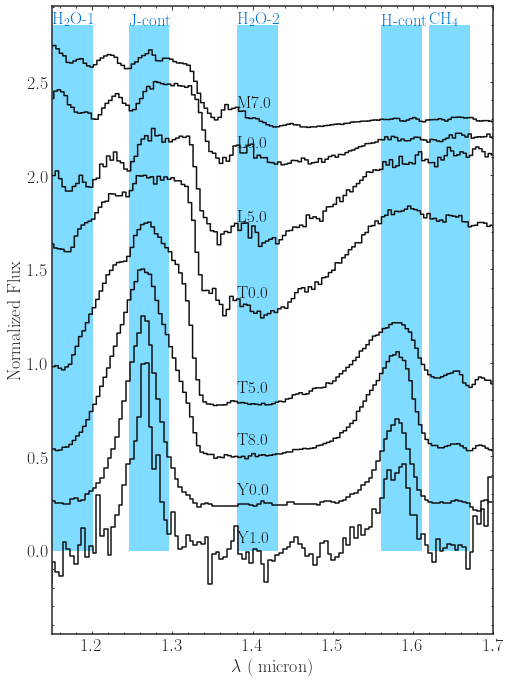

In [7]:
#spectral standards
bands=[[1.246, 1.295],[1.15, 1.20], [1.62,1.67], [1.56, 1.61], [1.38, 1.43]]
bandlabels=['J-cont', 'H$_2$O-1', 'CH$_4$', 'H-cont', 'H$_2$O-2']
st_spts=[splat.typeToNum(x) for x in np.flip([17, 20, 25, 30, 35, 38, 40, 41])]
standards=[splat.getStandard(x) for x in st_spts]

print (standards)
for s in standards: 
    s.normalize()
minima = 15.0
maxima = 40.0

fig, ax=plt.subplots(figsize=(6*1.2, 8*1.2))

for [idx, s], spt  in zip(enumerate(standards), st_spts):
    ax.step(s.wave.value, s.flux.value+idx/4, c='#111111')
    smrng=np.logical_and(s.wave.value>1.35, s.wave.value<=1.45)
    ax.text(1.38,  np.nanmedian(s.flux.value[smrng]+idx/4)+0.06, spt, {'fontsize':17},  color='#111111')

for wrng, wlabel in zip(bands,  bandlabels):
    rect=patches.Rectangle((wrng[0], 0), wrng[1]-wrng[0], 2.8, angle=0.0, color='#7FDBFF')
    ax.add_patch(rect)
    ax.text(wrng[0],2.8,wlabel, {'fontsize':17}, color='#0074D9')
    
ax.set_xlabel(r'$\lambda$ ( micron)', fontsize=18)
ax.set_ylabel(r'Normalized Flux', fontsize=18)
ax.set_xlim([1.15, 1.7])

plt.minorticks_on()
plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/standards.pdf')

spex sample

In [8]:
d=wisps.datasets['spex']

In [9]:
d2=wisps.datasets['schneider']

In [10]:
d3=wisps.datasets['manjavacas']

In [11]:
d['snrj']=d.snr1.apply(np.log10)
d2['snrj']=d2.snr1.apply(np.log10)
d3['snrj']=d3.snr1.apply(np.log10)

In [12]:
#d2=d.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [13]:
#d=d[d.spt>=17.]

In [14]:
#ds=d[d['metallicity_cls']=='d/sd']

In [15]:
#d2

In [16]:
#len(spex_data)

Filters

In [17]:
import splat.photometry as sphot
t0=splat.Spectrum(splat.STDS_DWARF_SPEX_KEYS['T0.0'])

In [18]:
f140=sphot.filterProfile('WFC3 F140W')

In [19]:
f160=sphot.filterProfile('WFC3 F160W')
f110=sphot.filterProfile('WFC3 F110W')
j_filt=sphot.filterProfile('2MASS J')
h_filt=sphot.filterProfile('2MASS H')

In [20]:
t0.scale(np.nanmax(f140[1]))

In [21]:
t0.shortname

'J1207+0244'

In [22]:
cmap=plt.cm.viridis

In [23]:
l5std=splat.getSpectrum(spt=25, young=False, snr=100, vlm=True)[0]


Retrieving 11 files



In [24]:

t5std=splat.getStandard(35)
l5std.normalize()
t5std.normalize()

In [25]:
(f140[1]).max()

0.555423

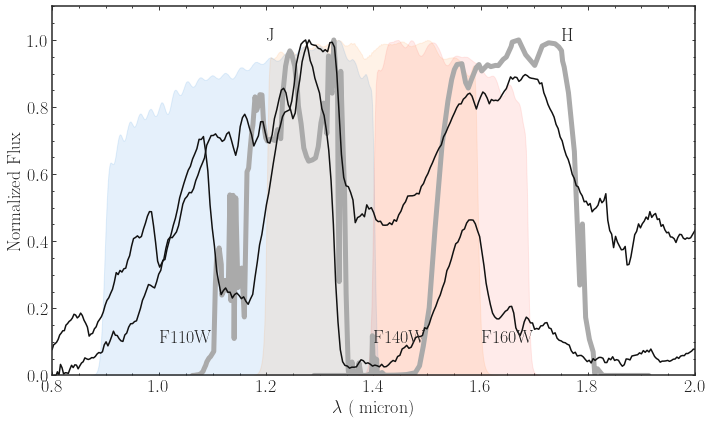

In [26]:
fig, ax=plt.subplots(figsize=(10, 6))

#2mass
ax.plot( j_filt[0], j_filt[1]/((j_filt[1]).max()), alpha=1., color='#AAAAAA',linewidth=5)
ax.plot( h_filt[0], h_filt[1]/((h_filt[1]).max()), alpha=1., color='#AAAAAA',linewidth=5)

#wfc3
ax.fill_between(f110[0], f110[1]*(1/(f110[1]).max()), 0, alpha=0.1, color='#0074D9')
ax.fill_between( f140[0], f140[1]*(1/(f140[1]).max()), 0, alpha=0.1, color='#FF851B')
ax.fill_between( f160[0], f160[1]*(1/(f160[1]).max()), 0, alpha=0.1, color='#FF4136')



ax.plot(l5std.wave, l5std.flux,  c='#111111')
ax.plot(t5std.wave, t5std.flux,  c='#111111')

ax.text(1.0, 0.1, 'F110W', {'fontsize':18} )
ax.text(1.2, 1.0, 'J', {'fontsize':18} )
ax.text(1.4, 0.1, 'F140W', {'fontsize':18} )
ax.text(1.6, 0.1, 'F160W', {'fontsize':18} )
ax.text(1.75, 1.0, 'H', {'fontsize':18} )


ax.set_xlim([0.8, 2.0])
ax.set_ylim([-0.0, 1.1])
ax.set_xlabel(r'$\lambda$ ( micron)', fontsize=18)
ax.set_ylabel(r'Normalized Flux', fontsize=18)
plt.minorticks_on()
plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/filter_profiles.pdf', bbox_inches='tight')

Sky positions 

In [27]:
t=pd.read_csv(wisps.OUTPUT_FILES+'/observation_log.csv').drop_duplicates(subset='POINTING')

In [28]:
#t

In [29]:
t_wisp=t[t.POINTING.str.contains('par*')]
t_hst3d=t[t.POINTING.str.contains('pa*').apply(lambda x: not x)]

In [30]:
#t_hst3d

This is an illustration of the modified snr

In [31]:
sp=wisps.Spectrum(filename='par32-00079')
sp=sp.splat_spectrum
sp.normalize()
#flag=sp.isEmpty()
snr1=np.array(sp.flux/sp.noise)
snr=snr1[~np.isnan(snr1)]
xgrid=np.linspace(np.nanmin(snr), np.nanmax(snr), len(sp.wave))
cdf=wisps.kde_statsmodels_m(snr, xgrid)

In [32]:
#sp1=wisps.Source(name='aegis-03-G141_17053')
#sp2=wisps.Source(name='Par32_BEAM_79A')

In [ ]:
sp1=wisps.Source(name='goodss-01-G141_45889')
sp2=wisps.Source(name='goodsn-24-G141_21552')

In [ ]:
sp1.normalize(wrange=[1.1, 1.65])
sp2.normalize(wrange=[1.1, 1.65])

In [35]:
std1=splat.getStandard(sp1.spectral_type)

In [36]:
std2=splat.getStandard(sp2.spectral_type)

In [37]:
std1.normalize(), std2.normalize()

(None, None)

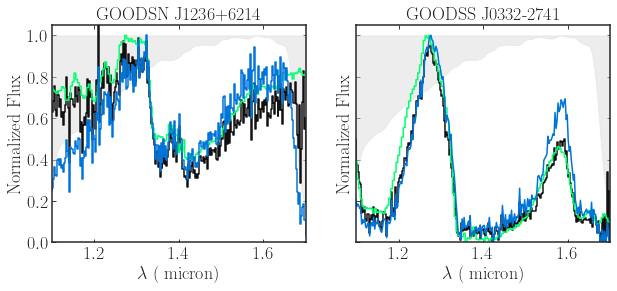

In [38]:
fig, (ax2, ax1)=plt.subplots(1, 2, figsize=(10,4), sharex=False, sharey=True)


ax1.step(sp1.wave, sp1.flux*5.55, c='#111111')
ax1.step(std1.wave, std1.flux, c='#01FF70')

ax1.plot(sp1.wave, (sp1.flux*sp1.sensitivity_curve)/(sp1.flux*sp1.sensitivity_curve).max(), c='#0074D9')
ax1.set_title(sp1.shortname.upper(), fontsize=18)


ax2.step(sp2.wave, sp2.flux*5.5, c='#111111')
ax2.step(std2.wave, std2.flux, c='#01FF70')
a2=ax2.step(sp2.wave, (sp2.flux*sp2.sensitivity_curve)/(sp2.flux*sp2.sensitivity_curve).max(), c='#0074D9')


ax1.fill_between(sp1.wave, sp1.sensitivity_curve/sp1.sensitivity_curve.max(), 1., alpha=0.5,  color='#DDDDDD')
ax2.fill_between(sp2.wave, sp2.sensitivity_curve/sp2.sensitivity_curve.max(), 1., alpha=0.5,  color='#DDDDDD')

ax2.set_title(sp2.shortname.upper(), fontsize=18)

for a in [ax1, ax2]:
    a.set_xlim([1.1, 1.7])
    a.set_xlabel(r'$\lambda$ ( micron)', fontsize=18)
    a.set_ylabel(r'Normalized Flux', fontsize=18)
    a.set_ylim([0., 1.05])


#plt.legend( ['Spectrum/Sensitivity', 'Sensitivity', 'Spectrum'], bbox_to_anchor=(0.3, 0.5), fontsize=18)
#ax2.legend(['spectrum/sensitivity', 'sensitivity', 'spectrum'], loc='best')
#plt.tight_layout()

plt.show()
fig.savefig(wisps.OUTPUT_FIGURES+'/sensitivity_illustration.pdf', bbox_inches='tight', fontsize=16)


In [39]:
#